In [2]:
!pip install -q pandas matplotlib 


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/workspace/slice-monorepo/sub_validations/unique_seq_sentence/5_example_context/inference_results.csv'
df = pd.read_csv(file_path)

# Filter the dataframe by inference_type
df_word = df[df['inference_type'] == 'word']
df_token = df[df['inference_type'] == 'token']

# Group by 'step' and count correct predictions
correct_word = df_word[df_word['correct'] == True].groupby('step')['correct'].count()
correct_token = df_token[df_token['correct'] == True].groupby('step')['correct'].count()

# Plotting the results for 'word'
plt.figure(figsize=(10, 6))
plt.plot(correct_word.index, correct_word.values, marker='o', linestyle='-', label='Word Inference')
plt.title('Correct Predictions per Step (Word Inference)')
plt.xlabel('Step')
plt.ylabel('Number of Correct Predictions')
plt.grid(True)
plt.legend()
plt.show()

# Plotting the results for 'token'
plt.figure(figsize=(10, 6))
plt.plot(correct_token.index, correct_token.values, marker='o', linestyle='-', label='Token Inference')
plt.title('Correct Predictions per Step (Token Inference)')
plt.xlabel('Step')
plt.ylabel('Number of Correct Predictions')
plt.grid(True)
plt.legend()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/workspace/slice-monorepo/sub_validations/unique_seq_sentence/5_example_context/inference_results.csv'

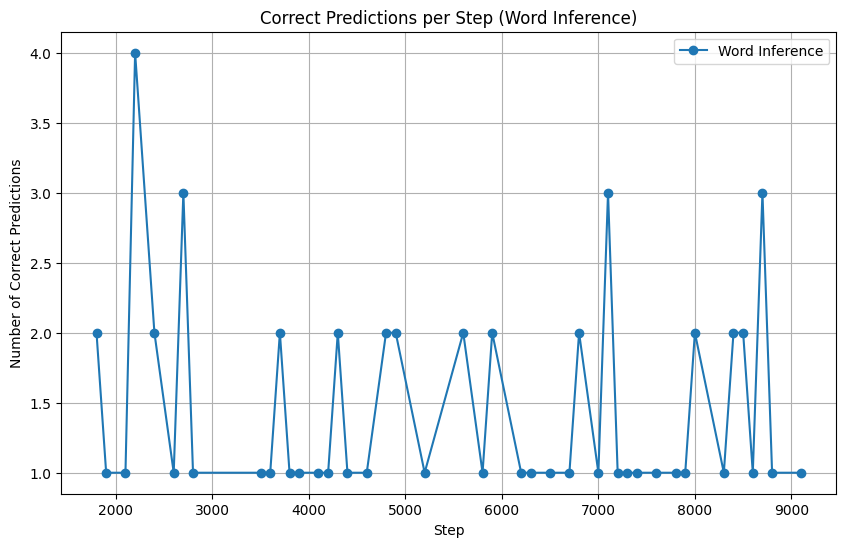

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the experiment name
experiment_name = "0_context_fast_1lr"

# Construct the file path using the experiment name
file_path = f'/workspace/slice-monorepo/sub_validations/unique_seq_sentence/experiments/{experiment_name}/inference_results.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Filter the dataframe by inference_type 'word'
df_word = df[df['inference_type'] == 'word']

# Group by 'step' and count correct predictions
correct_word = df_word[df_word['correct'] == True].groupby('step')['correct'].count()

# Plotting the results for 'word'
plt.figure(figsize=(10, 6))
plt.plot(correct_word.index, correct_word.values, marker='o', linestyle='-', label='Word Inference')
plt.title('Correct Predictions per Step (Word Inference)')
plt.xlabel('Step')
plt.ylabel('Number of Correct Predictions')
plt.grid(True)
plt.legend()
plt.show()


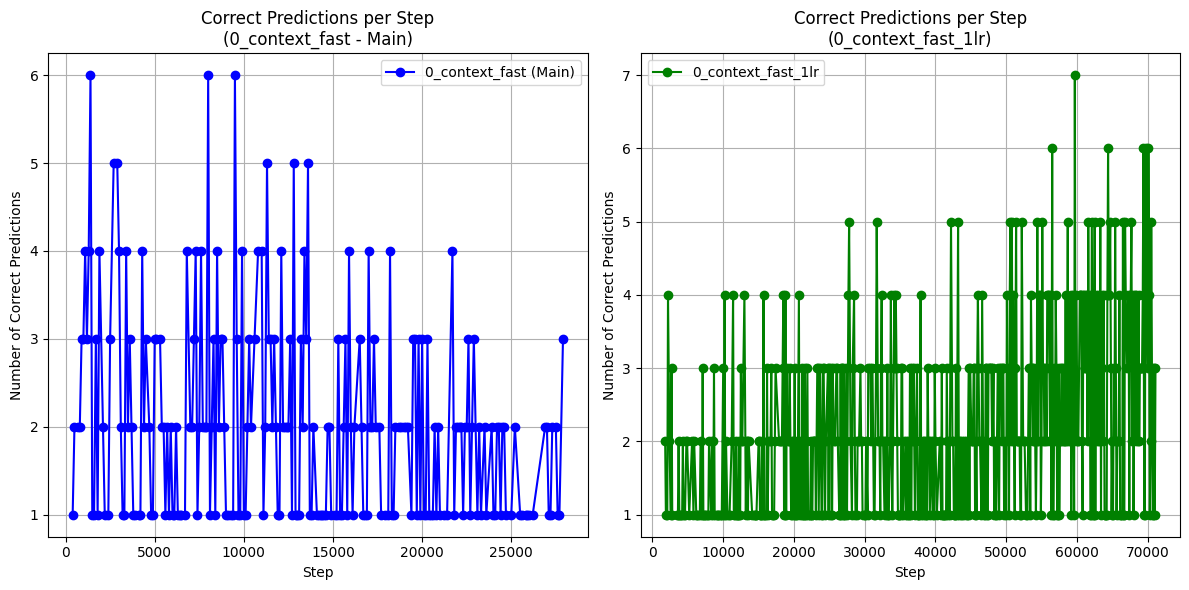

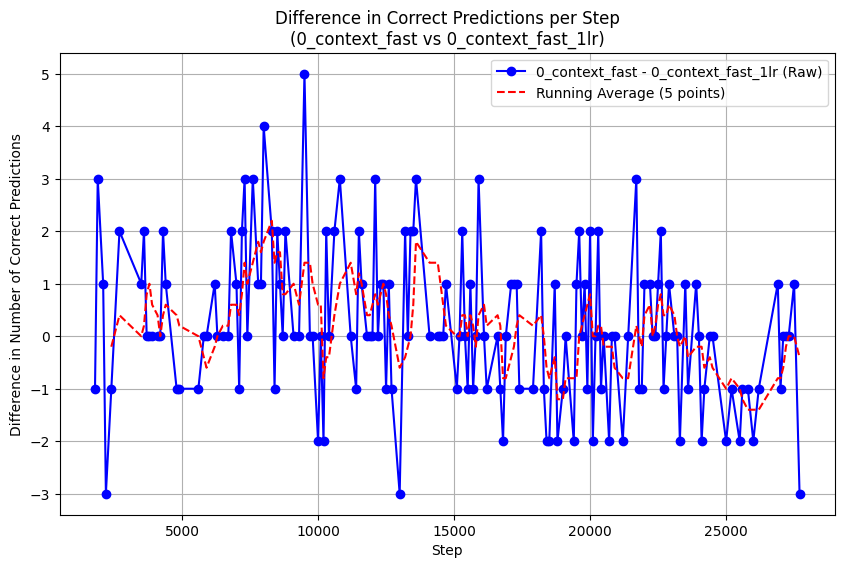

Cumulative difference (total sum) for 0_context_fast vs 0_context_fast_1lr: 31


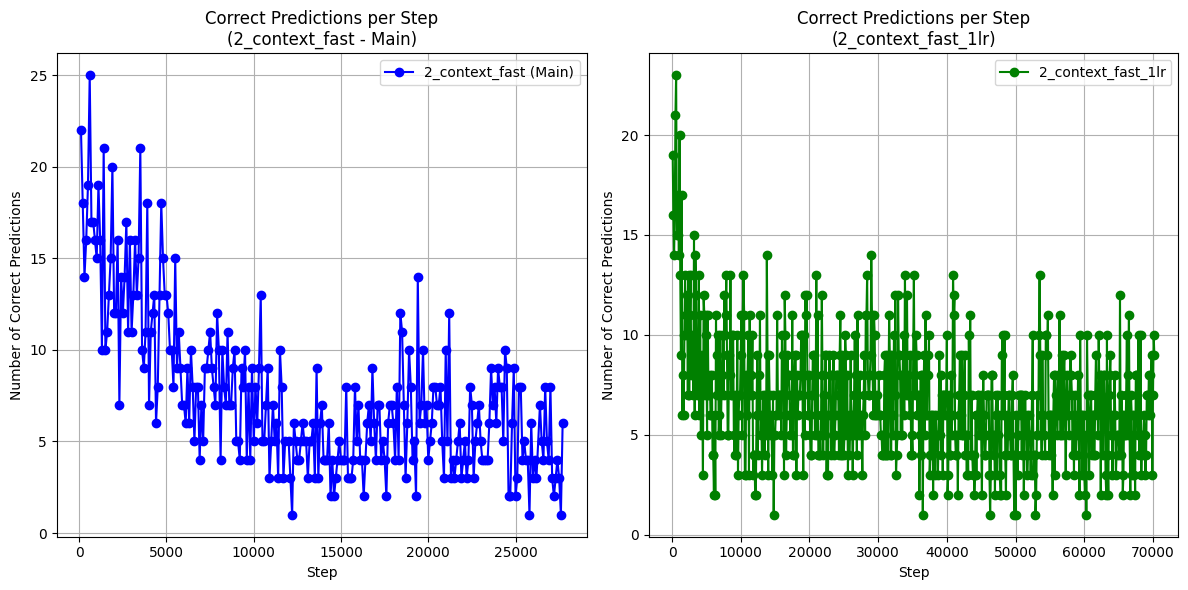

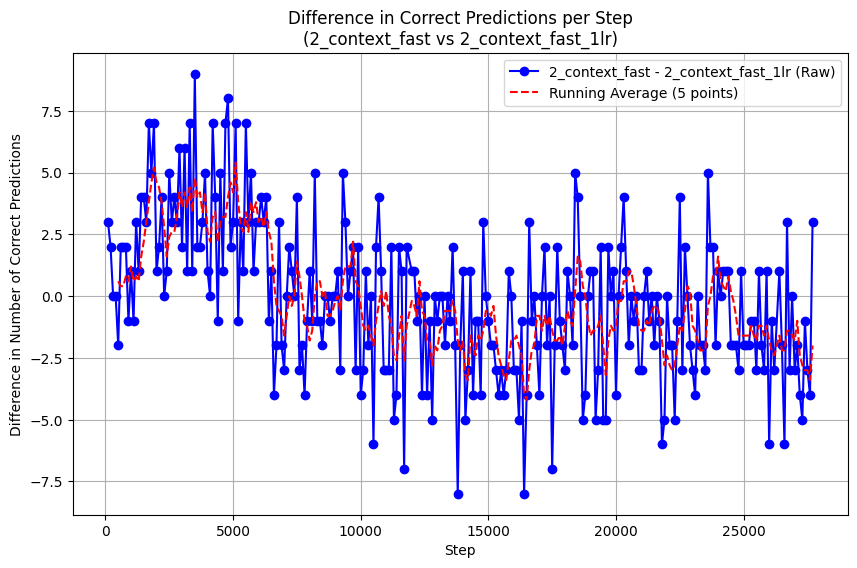

Cumulative difference (total sum) for 2_context_fast vs 2_context_fast_1lr: -43


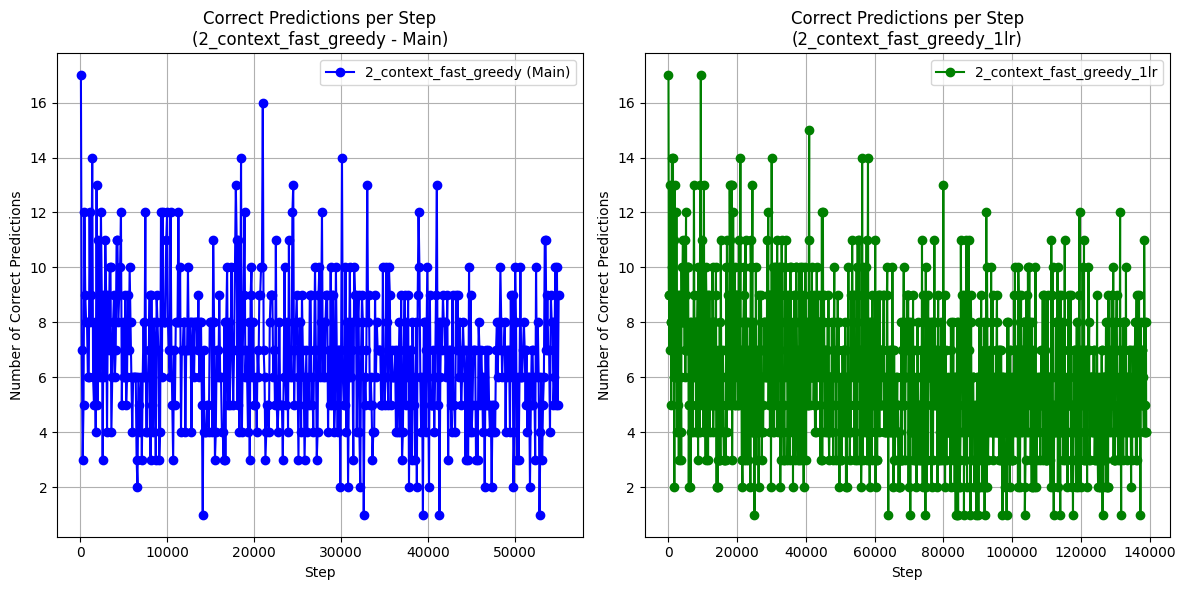

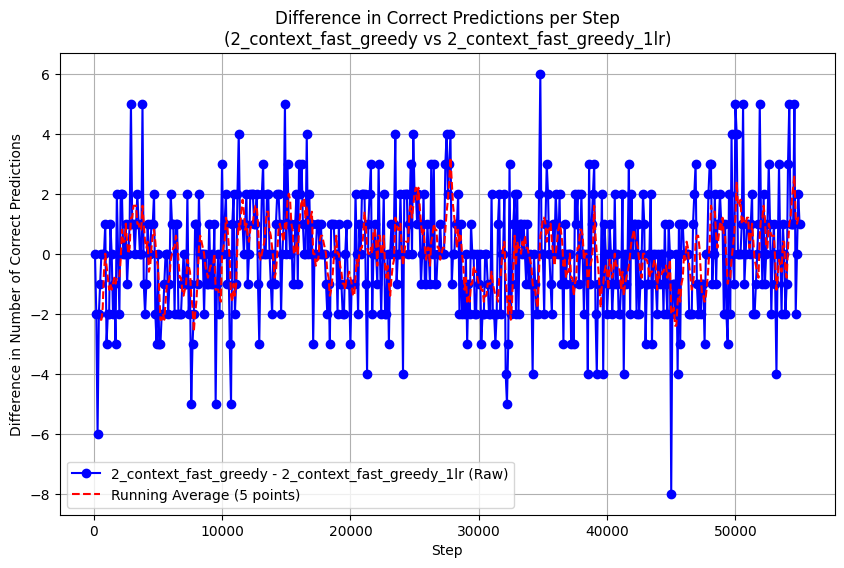

Cumulative difference (total sum) for 2_context_fast_greedy vs 2_context_fast_greedy_1lr: -12


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of experiments
experiment_names = ["0_context_fast", "2_context_fast", "2_context_fast_greedy"]  # Update with actual experiment names

for experiment_name in experiment_names:
    # Construct file paths for the main experiment and the companion "_1lr" experiment
    file_path_main = f'/workspace/slice-monorepo/sub_validations/unique_seq_sentence/experiments/{experiment_name}/inference_results.csv'
    file_path_lr = f'/workspace/slice-monorepo/sub_validations/unique_seq_sentence/experiments/{experiment_name}_1lr/inference_results.csv'

    # Load the CSV files
    df_main = pd.read_csv(file_path_main)
    df_lr = pd.read_csv(file_path_lr)

    # Filter the dataframes by 'word' inference_type
    df_word_main = df_main[df_main['inference_type'] == 'word']
    df_word_lr = df_lr[df_lr['inference_type'] == 'word']

    # Group by 'step' and count correct predictions
    correct_main = df_word_main[df_word_main['correct'] == True].groupby('step')['correct'].count()
    correct_lr = df_word_lr[df_word_lr['correct'] == True].groupby('step')['correct'].count()

    # Align the steps in both datasets, keeping only the common steps
    common_steps = correct_main.index.intersection(correct_lr.index)

    # Compute the difference in correct predictions for the common steps
    correct_diff = correct_main.loc[common_steps] - correct_lr.loc[common_steps]

    # Calculate a 5-point running average to smooth the noise
    running_avg = correct_diff.rolling(window=5).mean()

    # Calculate the total sum difference (cumulative difference)
    total_sum_diff = correct_diff.sum()

    # Plotting the correct predictions for both main and _1lr
    plt.figure(figsize=(12, 6))

    # Plot main experiment correct predictions
    plt.subplot(1, 2, 1)
    plt.plot(correct_main.index, correct_main.values, marker='o', linestyle='-', label=f'{experiment_name} (Main)', color='blue')
    plt.title(f'Correct Predictions per Step\n({experiment_name} - Main)')
    plt.xlabel('Step')
    plt.ylabel('Number of Correct Predictions')
    plt.grid(True)
    plt.legend()

    # Plot _1lr experiment correct predictions
    plt.subplot(1, 2, 2)
    plt.plot(correct_lr.index, correct_lr.values, marker='o', linestyle='-', label=f'{experiment_name}_1lr', color='green')
    plt.title(f'Correct Predictions per Step\n({experiment_name}_1lr)')
    plt.xlabel('Step')
    plt.ylabel('Number of Correct Predictions')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Plot the difference and running average
    plt.figure(figsize=(10, 6))
    plt.plot(correct_diff.index, correct_diff.values, marker='o', linestyle='-', label=f'{experiment_name} - {experiment_name}_1lr (Raw)', color='blue')
    plt.plot(running_avg.index, running_avg.values, color='red', linestyle='--', label=f'Running Average (5 points)')
    plt.title(f'Difference in Correct Predictions per Step\n({experiment_name} vs {experiment_name}_1lr)')
    plt.xlabel('Step')
    plt.ylabel('Difference in Number of Correct Predictions')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Print the cumulative difference for this experiment
    print(f'Cumulative difference (total sum) for {experiment_name} vs {experiment_name}_1lr: {total_sum_diff}')
